##### Purpose of the notebook ####

In [7]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import infercnvpy as cnv

/home/sergio/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read adata

In [2]:
saving_path='/media/sergio/Ymir/5kovarian_for_cnv/figures'
adata=sc.read('/media/sergio/Ymir/5kovarian_for_cnv/adata_moments_cnvinfered.h5ad')

# Code with infercnv (change kernel to infercnv)

In [10]:
sc.pp.subsample(adata,0.1)

In [11]:
adata.write('/media/sergio/Ymir/5kovarian_for_cnv/adata_moments_cnvinfered_subsampled01.h5ad')

# Analysis of cnvs across window_sizes

In [31]:
sc.pp.subsample(adata,0.1)

### CNV LEIDEN 0

In [83]:
cells_selected=list(adata.obs.loc[adata.obs['cnv_leiden']=='0','cell_id'])
window_sizes=[1,5,10,20,40,60,100,150,200]
results=pd.DataFrame(index=window_sizes,columns=adata.var.index)
for win_size in window_sizes:
    cnv.tl.infercnv(adata,reference_key="cell class",
    reference_cat=['Monocytes','B cells','T cells','Endothelial','Low expression','Fibroblasts']
     ,window_size=win_size,layer='M',calculate_gene_values=True)
    results.loc[win_size,:]=np.mean(adata.layers["gene_values_cnv"][adata.obs['cell_id'].isin(cells_selected),:],axis=0)

100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:45<00:00, 55.07s/it]


In [84]:
df_sorted = adata.var.sort_values(by=['chromosome', 'start'], ascending=[True, True])
results_sorted=results.loc[:,df_sorted.index]

In [85]:
colors = [
    "#FFFF00",  "#E6FF33",  "#CCFF66",    "#B3FF99",  "#99FFCC",  "#80FFBF",  "#66FF99", 
    "#33FF66", "#00FF33",    "#00FF66",  "#00FF99",   "#00FFFF","#0099FF",  "#0066FF",  
    "#3300FF",   "#6600FF",   "#9900FF",  "#CC00FF",   "#FF00FF", "#FF0099",  
    "#FF0066",  "#FF0033",  "#FF3300",  "#FF0000"   # Red
]
cool=dict(zip(np.unique(df_sorted['chromosome']),colors))

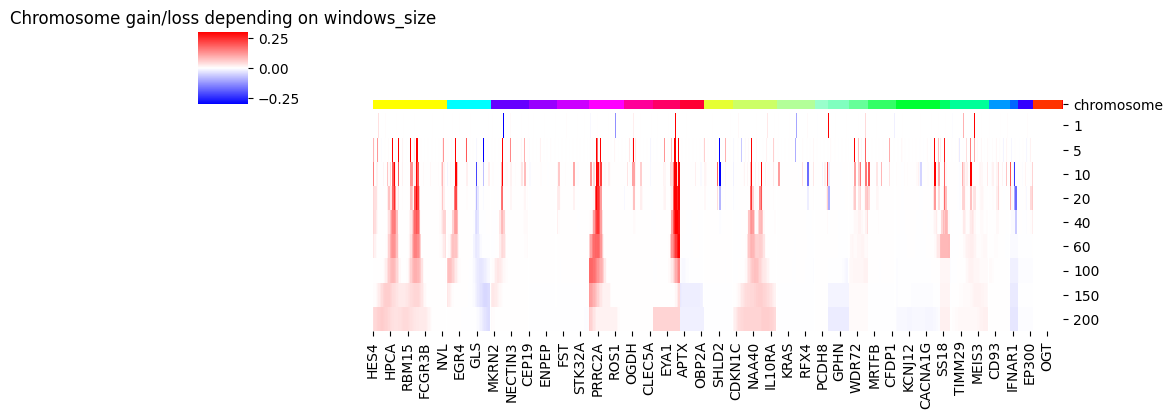

In [89]:
sns.clustermap(results_sorted.astype(float),cmap='bwr',vmax=0.3,vmin=-0.3,col_cluster=False,row_cluster=False,
              figsize=(10,4),col_colors=df_sorted['chromosome'].map(cool))
plt.title('Chromosome gain/loss depending on windows_size')
plt.savefig(os.path.join(saving_path,'heatmap_cnv_leiden_0_depending_on_window_size.pdf'))

In [88]:
results_sorted.to_csv(os.path.join(saving_path,'cnv_leiden_0_depending_on_window_size.csv'))

In [ ]:
# Do same on 

# Analysis on sequencing depth

In [101]:
adata=sc.read('/media/sergio/Ymir/5kovarian_for_cnv/adata_moments_cnvinfered_subsampled01.h5ad')

In [122]:
sc.pp.subsample(adata,0.1)

In [123]:
cells_selected=list(adata.obs.loc[adata.obs['cnv_leiden']=='0','cell_id'])

In [124]:
adata2=adata.copy()
adata2.X=adata2.layers['raw'] # note raw is not really raw right now

In [125]:
set_n_counts_cell=[10,50,100,250,500,750,1000,None]
results=pd.DataFrame(index=set_n_counts_cell,columns=adata.var.index)

In [126]:
n_counts_cell=100
sc.pp.downsample_counts(adata2,counts_per_cell=n_counts_cell)

In [127]:
wsize=60

In [133]:
cnv.tl.infercnv(adata2,reference_key="cell class",
reference_cat=['Monocytes','B cells','T cells','Endothelial','Low expression','Fibroblasts']
,window_size=wsize,layer='M',calculate_gene_values=True)
results.loc[n_counts_cell,:]=np.mean(adata.layers["gene_values_cnv"][adata.obs['cell_id'].isin(cells_selected),:],axis=0)

100%|█████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:35<00:00, 71.83s/it]


In [134]:
df_sorted = adata.var.sort_values(by=['chromosome', 'start'], ascending=[True, True])
results_sorted=results.loc[:,df_sorted.index]

In [135]:
colors = ["#FFFF00",  "#E6FF33",  "#CCFF66",    "#B3FF99",  "#99FFCC",  "#80FFBF",  "#66FF99", 
    "#33FF66", "#00FF33",    "#00FF66",  "#00FF99",   "#00FFFF","#0099FF",  "#0066FF",  
    "#3300FF",   "#6600FF",   "#9900FF",  "#CC00FF",   "#FF00FF", "#FF0099",  
    "#FF0066",  "#FF0033",  "#FF3300",  "#FF0000"]
cool=dict(zip(np.unique(df_sorted['chromosome']),colors))

Text(0.5, 1.0, 'Chromosome gain/loss depending on windows_size')

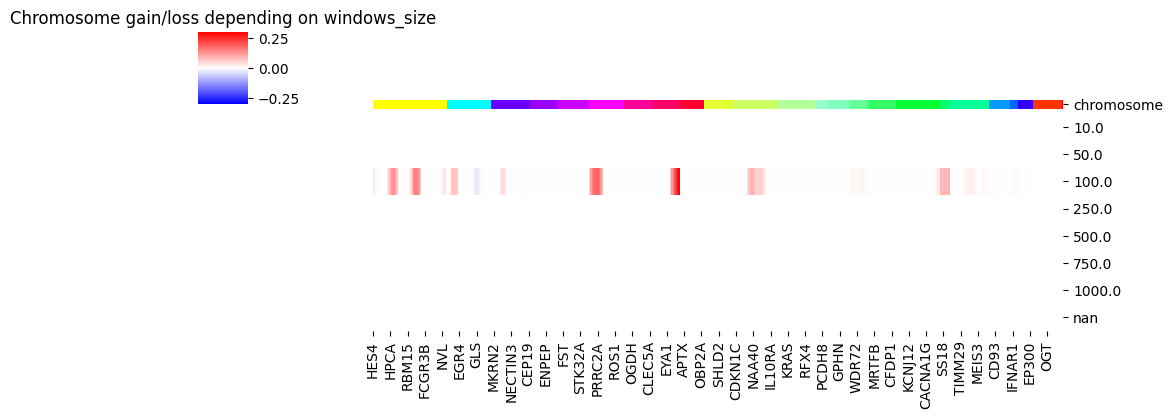

In [136]:
sns.clustermap(results_sorted.astype(float),cmap='bwr',vmax=0.3,vmin=-0.3,col_cluster=False,row_cluster=False,
              figsize=(10,4),col_colors=df_sorted['chromosome'].map(cool))
plt.title('Chromosome gain/loss depending on windows_size')
